Initial Columns:
 ['id', 'interest_rate_spread', 'upfront_charges', 'ltv', 'loan_limit_ncf', 'approv_in_adv_pre', 'credit_worthiness_l2', 'open_credit_opc', 'business_or_commercial_nob_c', 'neg_ammortization_not_neg', 'interest_only_not_int', 'lump_sum_payment_not_lpsm', 'construction_type_sb', 'secured_by_land', 'co_applicant_credit_type_exp', 'submission_of_application_to_inst', 'security_type_direct']

Dataset Shape: (148670, 17)

Missing Data Before Cleaning:
 0  missing values total.

Missing Data Report:
 Series([], dtype: int64)


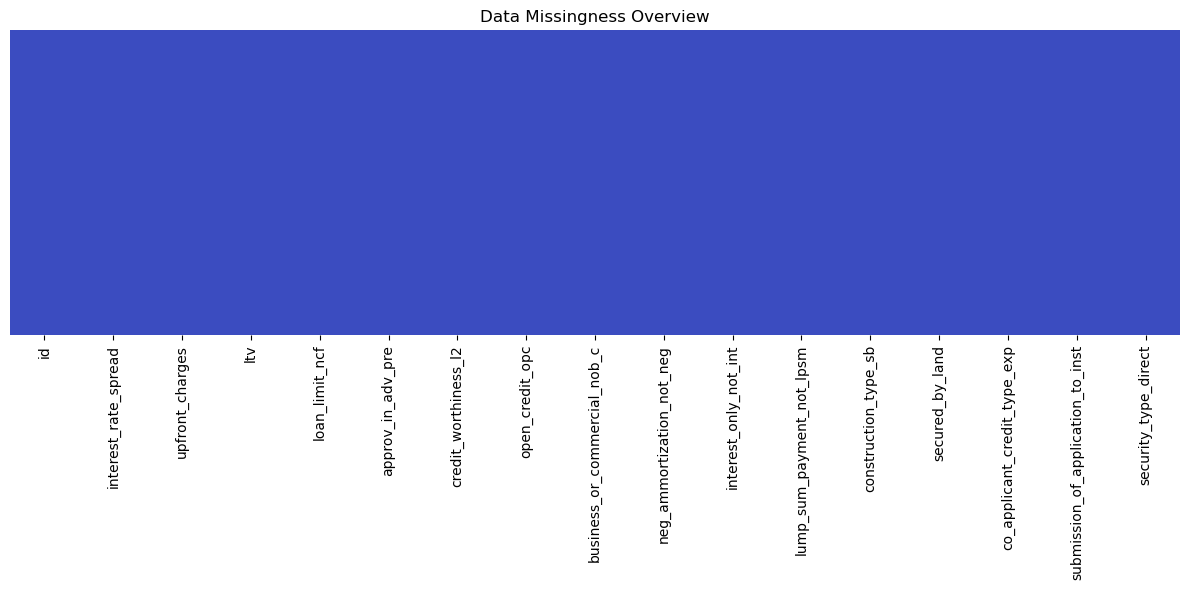


Missing Data After Cleaning:
 Series([], dtype: int64)
Removed 0 unhelpful columns: []

Target column not found — adding synthetic 'Loan_Default' column for demo.
Clean dataset saved successfully at: Loan_Default_Cleaned.csv

Dataset Summary:
                   id  interest_rate_spread  upfront_charges            ltv  \
count  148670.000000         148670.000000    148670.000000  148670.000000   
mean        0.500000              0.512288         0.366310       0.488527   
std         0.288678              0.235334         0.280611       0.200175   
min         0.000000              0.000000         0.000000       0.000000   
25%         0.250000              0.375000         0.159261       0.375000   
50%         0.500000              0.494099         0.330811       0.513137   
75%         0.750000              0.625000         0.495557       0.625000   
max         1.000000              1.000000         1.000000       1.000000   

        Loan_Default  
count  148670.000000  
mean  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("Loan_Default.csv")

print("Initial Columns:\n", df.columns.tolist())
print("\nDataset Shape:", df.shape)
print("\nMissing Data Before Cleaning:\n", df.isna().sum().sum(), " missing values total.")

def missing_report(data):
    missing = data.isna().sum()
    return missing[missing > 0]

print("\nMissing Data Report:\n", missing_report(df))

def show_missing_pattern(data):
    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isna(), cbar=False, cmap='coolwarm', yticklabels=False)
    plt.title("Data Missingness Overview")
    plt.tight_layout()
    plt.show()

show_missing_pattern(df)

def handle_missing_values(data):
    filled_data = data.copy()
    for feature in filled_data.columns:
        if filled_data[feature].dtype == 'object':
            fill_value = filled_data[feature].mode().iloc[0]
        else:
            fill_value = filled_data[feature].median()
        filled_data[feature] = filled_data[feature].fillna(fill_value)
    return filled_data

df = handle_missing_values(df)
print("\nMissing Data After Cleaning:\n", missing_report(df))

df.drop_duplicates(inplace=True)

def prune_columns(data, miss_threshold=0.9, low_unique_threshold=0.01):
    drop_list = []
    for feature in data.columns:
        null_ratio = data[feature].isna().mean()
        unique_ratio = data[feature].nunique() / len(data)

        if null_ratio > miss_threshold:
            drop_list.append(feature)
        elif data[feature].nunique() <= 1:
            drop_list.append(feature)
        elif unique_ratio < low_unique_threshold and data[feature].nunique() > 2:
            drop_list.append(feature)

    data = data.drop(columns=drop_list)
    print(f"Removed {len(drop_list)} unhelpful columns: {drop_list}")
    return data

df = prune_columns(df)

def adjust_data_types(data):
    binary_dict = {'Yes': 1, 'No': 0, 'Y': 1, 'N': 0, 'True': 1, 'False': 0}
    data = data.replace(binary_dict)

    for feature in data.select_dtypes(include=['object']).columns:
        if data[feature].nunique() <= 20:
            data[feature] = data[feature].astype('category')
    return data

df = adjust_data_types(df)

def convert_categorical_to_numeric(data):
    cat_features = data.select_dtypes(include=['object', 'category']).columns.tolist()
    data = pd.get_dummies(data, columns=cat_features, drop_first=True)
    return data

df = convert_categorical_to_numeric(df)

def cap_outliers(data, factor=1.5):
    num_features = data.select_dtypes(include=[np.number]).columns
    for feature in num_features:
        q1, q3 = data[feature].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower, upper = q1 - factor * iqr, q3 + factor * iqr
        data[feature] = np.clip(data[feature], lower, upper)
    return data

df = cap_outliers(df)

def normalize_features(data):
    scaler = MinMaxScaler()
    numeric_features = data.select_dtypes(include=[np.number]).columns
    data[numeric_features] = scaler.fit_transform(data[numeric_features])
    return data

df = normalize_features(df)

if 'Loan_Default' not in df.columns:
    print("\nTarget column not found — adding synthetic 'Loan_Default' column for demo.")
    df['Loan_Default'] = np.random.choice([0, 1], size=len(df))

def export_clean_data(data, path):
    data.to_csv(path, index=False)
    print(f"Clean dataset saved successfully at: {path}")

export_clean_data(df, "Loan_Default_Cleaned.csv")

def import_clean_data(path):
    return pd.read_csv(path)

df = import_clean_data("Loan_Default_Cleaned.csv")

def summarize_data(data, target_col='Loan_Default'):
    print("\nDataset Summary:\n", data.describe())
    if target_col in data.columns:
        print("\nTarget Distribution:\n", data[target_col].value_counts(normalize=True))
    else:
        print(f"\nTarget column '{target_col}' not found in dataset.")
    print("\nData Types Breakdown:\n", data.dtypes.value_counts())
    print("\nFinal Dataset Shape:", data.shape)
    print("\nFinal Columns:\n", data.columns.tolist())

summarize_data(df)

All visualizations and summary files will be saved in: C:\Users\varsh\CreditPathAI_Project\outputs

Loaded dataset with shape: (148670, 18)
Columns: ['id', 'interest_rate_spread', 'upfront_charges', 'ltv', 'loan_limit_ncf', 'approv_in_adv_pre', 'credit_worthiness_l2', 'open_credit_opc', 'business_or_commercial_nob_c', 'neg_ammortization_not_neg', 'interest_only_not_int', 'lump_sum_payment_not_lpsm', 'construction_type_sb', 'secured_by_land', 'co_applicant_credit_type_exp', 'submission_of_application_to_inst', 'security_type_direct', 'Loan_Default']

Numeric Summary Statistics:
                   id  interest_rate_spread  upfront_charges            ltv  \
count  148670.000000         148670.000000    148670.000000  148670.000000   
mean        0.500000              0.512288         0.366310       0.488527   
std         0.288678              0.235334         0.280611       0.200175   
min         0.000000              0.000000         0.000000       0.000000   
25%         0.250000     

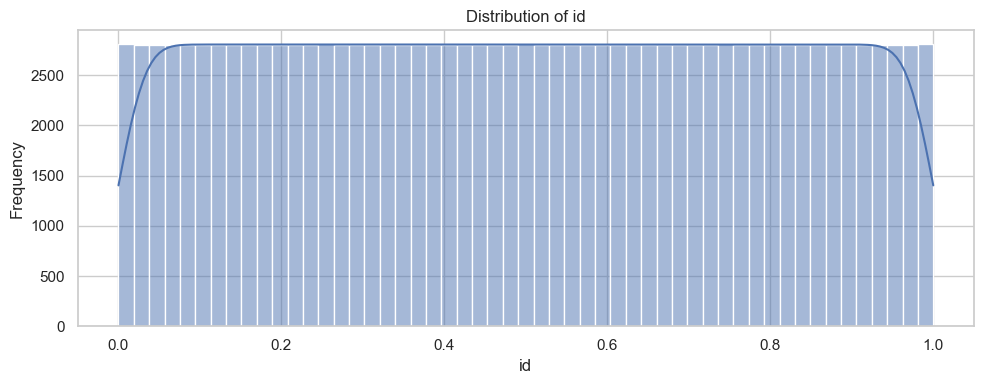

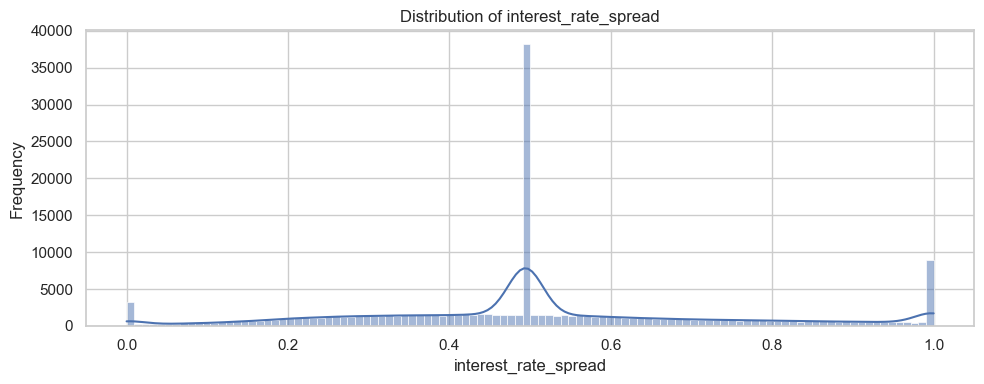

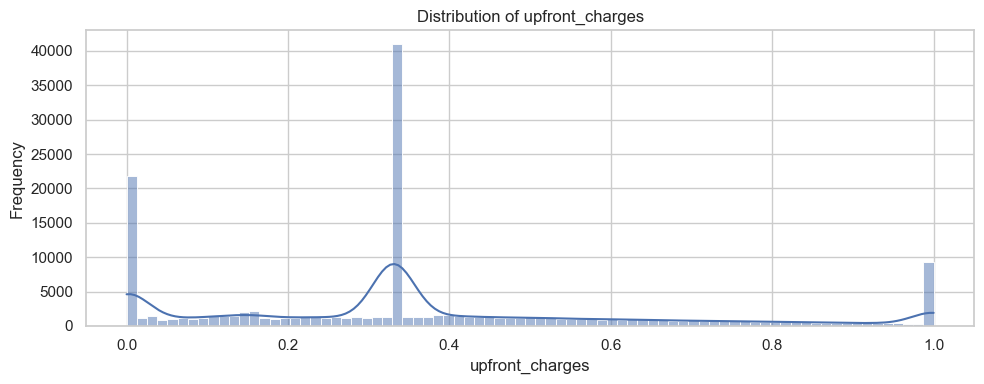

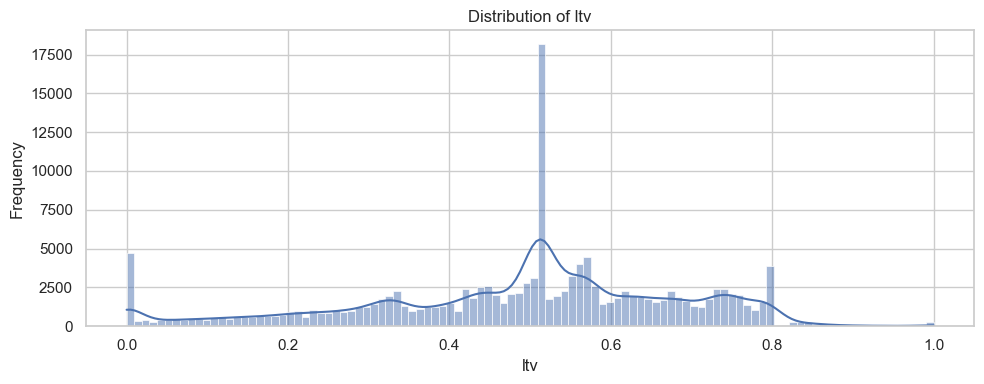

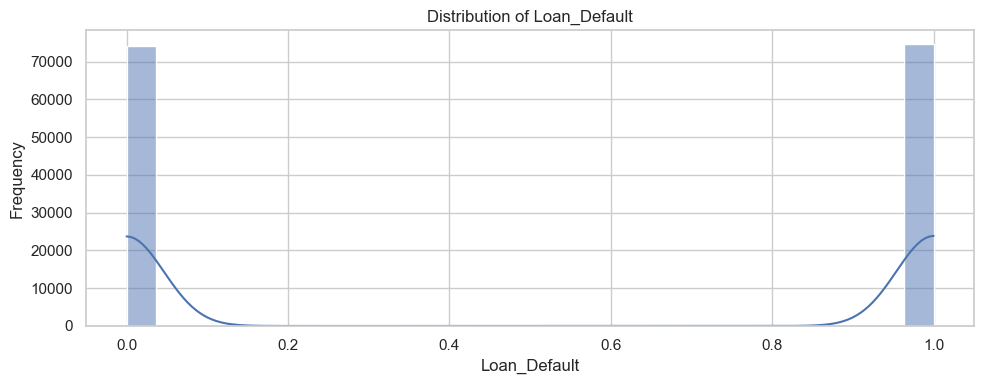

Numeric distribution plots saved.
No categorical columns to plot.


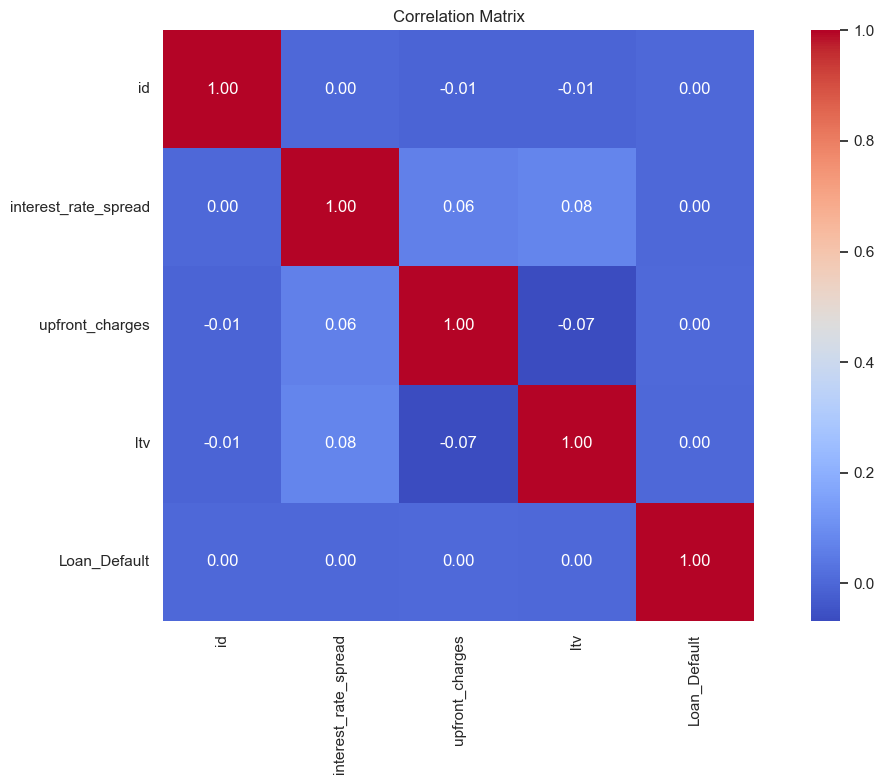

Correlation matrix saved.


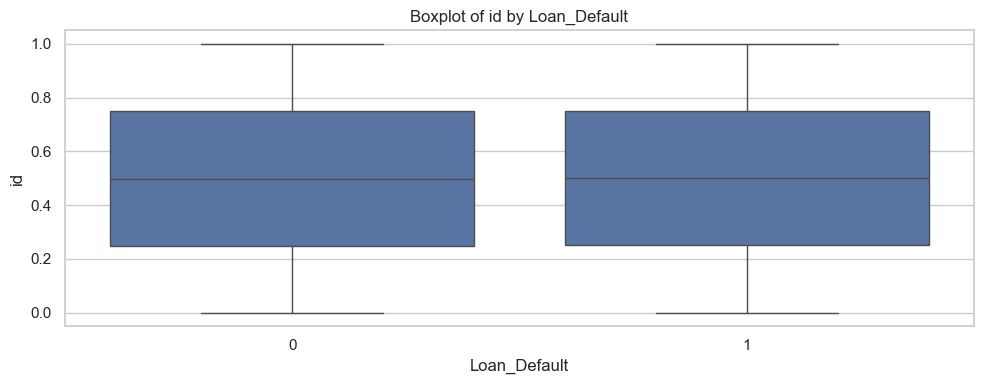

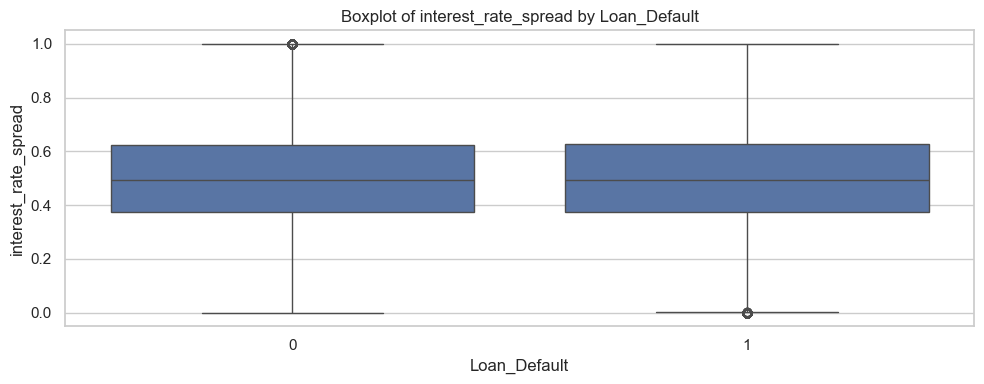

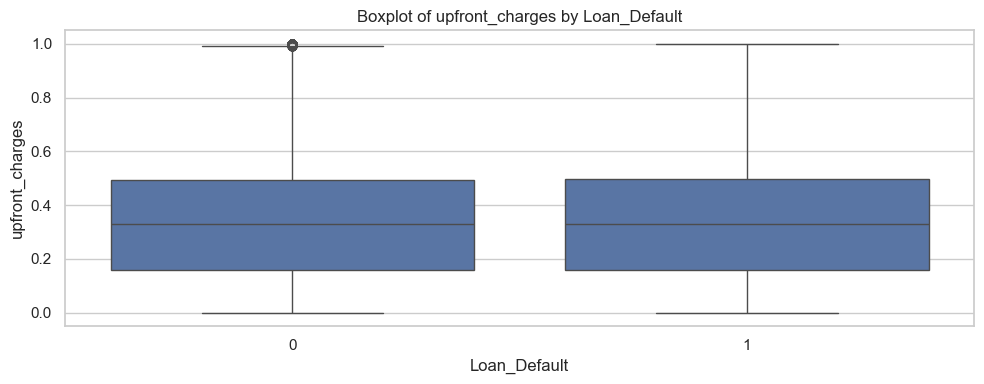

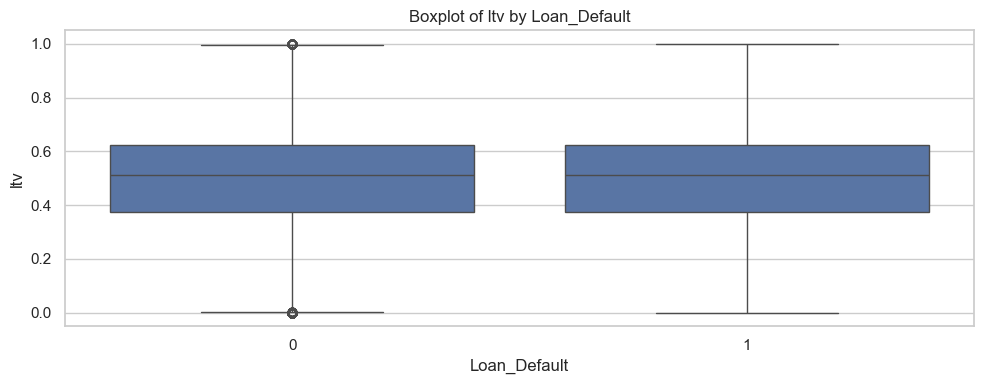

Boxplots saved.


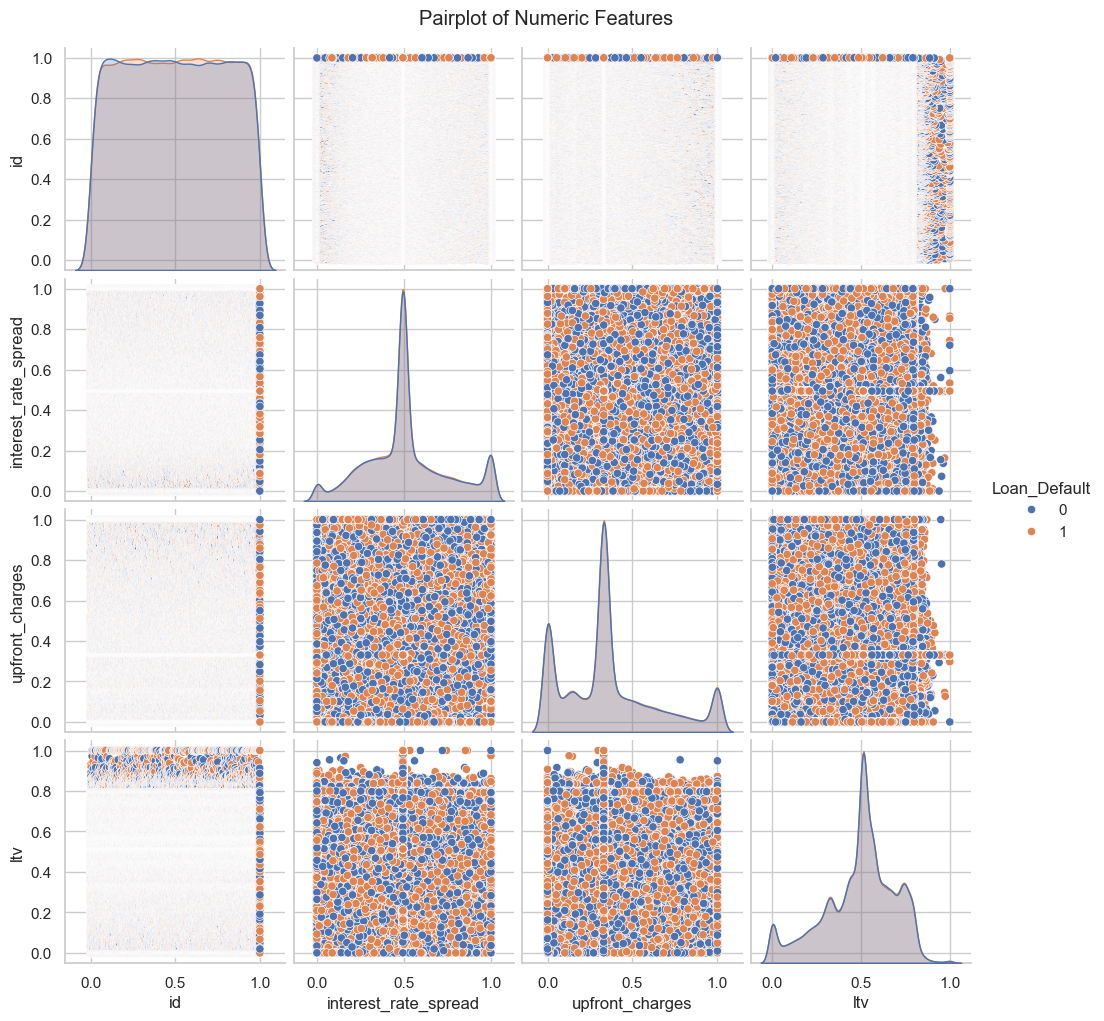

Pairplot saved.
Interactive scatter plot saved as HTML.
Summary statistics exported:
 - C:\Users\varsh\CreditPathAI_Project\outputs\numeric_summary.csv
 - C:\Users\varsh\CreditPathAI_Project\outputs\categorical_summary.csv

All visualizations and summary files have been successfully generated!


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")

SAVE_DIR = os.path.join(os.getcwd(), "outputs")
os.makedirs(SAVE_DIR, exist_ok=True)
print(f"All visualizations and summary files will be saved in: {SAVE_DIR}")

# Load data
df = pd.read_csv("Loan_Default_Cleaned.csv")
print(f"\nLoaded dataset with shape: {df.shape}")
print("Columns:", df.columns.tolist())

# If target column doesn't exist, create one (for testing)
if 'Loan_Default' not in df.columns:
    print("No target column found — adding synthetic 'Loan_Default' column for demo.")
    df['Loan_Default'] = np.random.choice([0, 1], size=len(df))

def numeric_summary(df):
    """Return summary statistics for numeric columns in the DataFrame."""
    numeric_cols = df.select_dtypes(include=[np.number])
    return numeric_cols.describe()

numeric_stats = numeric_summary(df)
print("\nNumeric Summary Statistics:\n", numeric_stats)

def categorical_summary(df, verbose=True):
    """Return summary stats for categorical columns."""
    cats = df.select_dtypes(include=['object', 'category'])
    if cats.shape[1] == 0:
        if verbose:
            print("No categorical columns found (likely after encoding).")
        return pd.DataFrame(columns=["count", "unique", "top", "freq"])
    summary = cats.describe()
    if verbose:
        print("Categorical Summary Statistics:\n", summary)
    return summary

_ = categorical_summary(df)

def plot_distributions(df, show=True):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        plt.figure(figsize=(10, 4))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        save_path = os.path.join(SAVE_DIR, f"distribution_{col}.png")
        plt.savefig(save_path)
        if show:
            plt.show()
        plt.close()
    print("Numeric distribution plots saved.")

plot_distributions(df)

def plot_categorical_counts(df, show=True):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) == 0:
        print("No categorical columns to plot.")
        return
    for col in categorical_cols:
        plt.figure(figsize=(10, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Count Plot of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.tight_layout()
        save_path = os.path.join(SAVE_DIR, f"countplot_{col}.png")
        plt.savefig(save_path)
        if show:
            plt.show()
        plt.close()
    print("Categorical count plots saved.")

plot_categorical_counts(df)

def correlation_matrix(df, show=True):
    numeric_cols = df.select_dtypes(include=[np.number])
    corr = numeric_cols.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    save_path = os.path.join(SAVE_DIR, "correlation_matrix.png")
    plt.savefig(save_path)
    if show:
        plt.show()
    plt.close()
    print("Correlation matrix saved.")

correlation_matrix(df)

def plot_box_by_target(df, target='Loan_Default', show=True):
    """Plot numeric variables grouped by target if it exists."""
    if target not in df.columns:
        print(f"Target column '{target}' not found — skipping boxplots.")
        return
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col != target]
    for col in numeric_cols:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[target], y=df[col])
        plt.title(f'Boxplot of {col} by {target}')
        plt.xlabel(target)
        plt.ylabel(col)
        plt.tight_layout()
        save_path = os.path.join(SAVE_DIR, f"boxplot_{col}_by_{target}.png")
        plt.savefig(save_path)
        if show:
            plt.show()
        plt.close()
    print("Boxplots saved.")

plot_box_by_target(df)

def plot_pairplot(df, target='Loan_Default', show=True):
    """Plot pairplot of selected numeric features."""
    top_cols = df.select_dtypes(include=[np.number]).columns[:5].tolist()
    if target in df.columns and target not in top_cols:
        top_cols.append(target)
    if len(top_cols) >= 2:
        g = sns.pairplot(df[top_cols], hue=target, diag_kind='kde')
        g.fig.suptitle('Pairplot of Numeric Features', y=1.02)
        save_path = os.path.join(SAVE_DIR, "pairplot_numeric_features.png")
        g.savefig(save_path)
        if show:
            plt.show()
        plt.close()
        print("Pairplot saved.")
    else:
        print("Not enough numeric columns for pairplot.")

plot_pairplot(df)

def interactive_scatter_plot(df, x='ltv', y='interest_rate_spread', color='Loan_Default'):
    """Create interactive Plotly visualizations safely."""
    if x not in df.columns or y not in df.columns:
        print("Missing columns for scatter plot — skipping.")
        return

    fig = px.scatter(df, x=x, y=y, color=color, title=f'{y} vs {x}')
    fig.write_html(os.path.join(SAVE_DIR, "scatter_plot.html"))
    print("Interactive scatter plot saved as HTML.")

interactive_scatter_plot(df)

def export_summary_statistics(df):
    numeric_stats = numeric_summary(df)
    cat_stats = categorical_summary(df, verbose=False)

    num_path = os.path.join(SAVE_DIR, "numeric_summary.csv")
    cat_path = os.path.join(SAVE_DIR, "categorical_summary.csv")

    numeric_stats.to_csv(num_path)
    cat_stats.to_csv(cat_path)

    print(f"Summary statistics exported:\n - {num_path}\n - {cat_path}")

export_summary_statistics(df)

print("\nAll visualizations and summary files have been successfully generated!")


Checking correlation among numerical features...


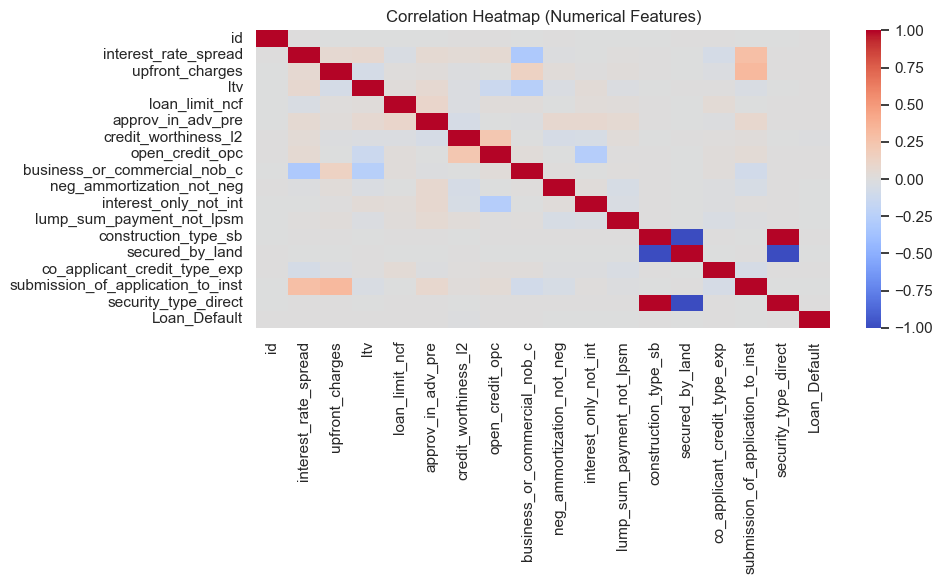


Top correlations with 'Loan_Default':
Loan_Default                    1.000000
upfront_charges                 0.004394
co_applicant_credit_type_exp    0.003607
business_or_commercial_nob_c    0.002393
loan_limit_ncf                  0.002243
approv_in_adv_pre               0.002066
id                              0.001646
interest_rate_spread            0.000836
construction_type_sb            0.000491
security_type_direct            0.000491
Name: Loan_Default, dtype: float64


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

print("\nChecking correlation among numerical features...")
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.show()

# Optional: check strongest correlations with target
if 'Loan_Default' in df.columns:
    print("\nTop correlations with 'Loan_Default':")
    print(corr['Loan_Default'].sort_values(ascending=False).head(10))
else:
    print("'Loan_Default' column not found. Skipping target correlation analysis.")


Model Trained Successfully!
Accuracy: 50.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.51     14827
           1       0.50      0.49      0.49     14907

    accuracy                           0.50     29734
   macro avg       0.50      0.50      0.50     29734
weighted avg       0.50      0.50      0.50     29734



C:\Users\varsh\AppData\Local\Temp\ipykernel_21580\4039451709.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




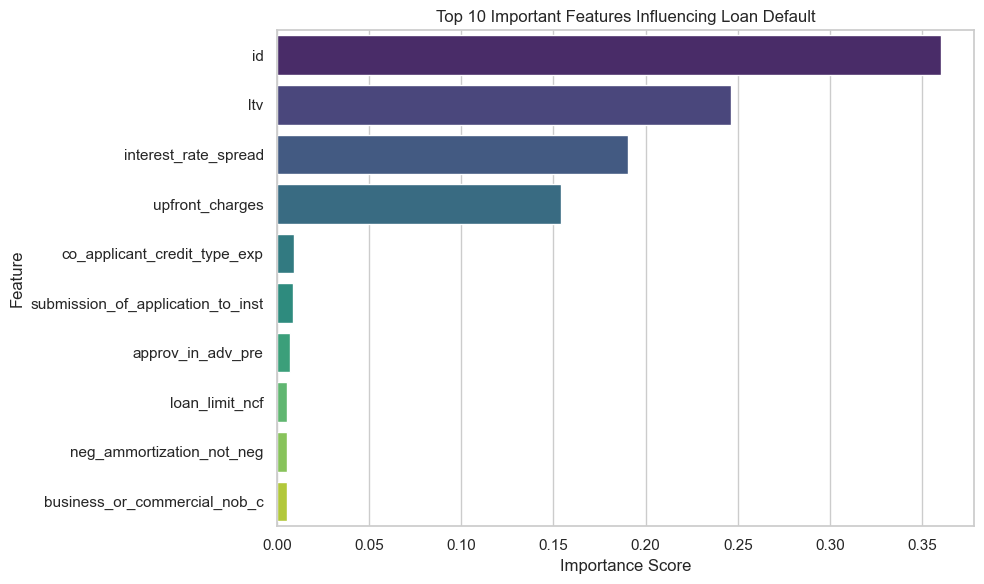

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

if 'Loan_Default' in df.columns:
    X = df.drop('Loan_Default', axis=1)
    y = df['Loan_Default']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    model = RandomForestClassifier(random_state=42, n_estimators=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\nModel Trained Successfully!")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Feature Importance Plot
    importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances.head(10), y=importances.head(10).index, palette="viridis")
    plt.title("Top 10 Important Features Influencing Loan Default")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
else:
    print("'Loan_Default' column not found. Skipping model section.")


Default Rate in Dataset: 50.13%


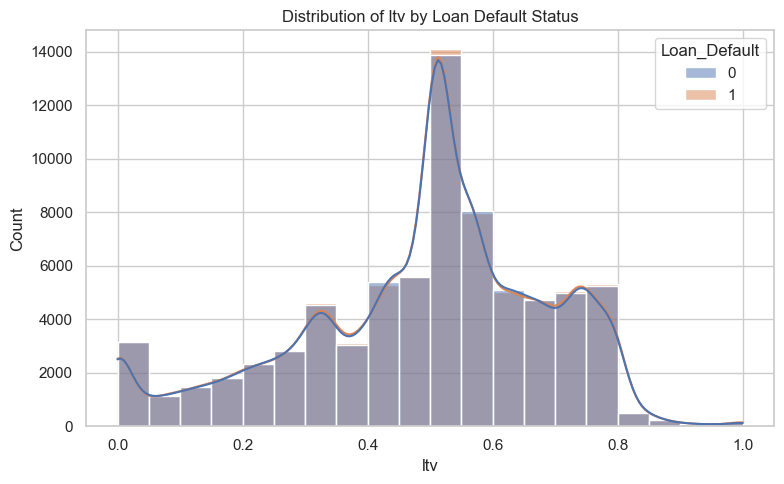

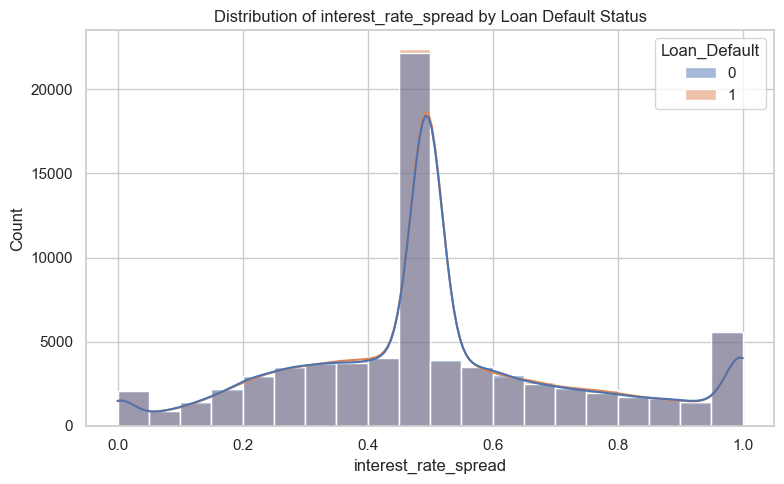

In [5]:
if 'Loan_Default' in df.columns:
    default_rate = df['Loan_Default'].mean() * 100
    print(f"\nDefault Rate in Dataset: {default_rate:.2f}%")

    # Example visualization (replace column names with actual ones from your dataset if available)
    for col in ['ltv', 'interest_rate_spread']: 
        if col in df.columns:
            plt.figure(figsize=(8, 5))
            sns.histplot(data=df, x=col, hue='Loan_Default', kde=True, bins=20)
            plt.title(f"Distribution of {col} by Loan Default Status")
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.tight_layout()
            plt.show()
else:
    print("No 'Loan_Default' column found for insight generation.")

In [7]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
    --------------------------------------- 1.6/72.0 MB 5.2 MB/s eta 0:00:14
   - -------------------------------------- 3.1/72.0 MB 5.9 MB/s eta 0:00:12
   -- ------------------------------------- 4.5/72.0 MB 6.2 MB/s eta 0:00:11
   --- ------------------------------------ 6.0/72.0 MB 6.6 MB/s eta 0:00:11
   ---- ----------------------------------- 7.6/72.0 MB 6.5 MB/s eta 0:00:10
   ---- ----------------------------------- 8.7/72.0 MB 6.5 MB/s eta 0:00:10
   ----- ---------------------------------- 10.5/72.0 MB 6.5 MB/s eta 0:00:10
   ------ --------------------------------- 11.8/72.0 MB 6.5 MB/s eta 0:00:10
   ------- -------------------------------- 13.1/72.0 MB 6.4 MB/s eta 0:00:10
   -------- ------------------------------- 14.4/72.0 MB 6.4 MB/s eta 0:00:09
   -------- ------------------------------- 15.7/72.0 MB 6.4 MB/s eta 0:00:09
   -----

In [ ]:
import sys
print(sys.executable)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

if 'Loan_Default' not in df.columns:
    raise ValueError("'Loan_Default' column not found in the dataset!")

X = df.drop('Loan_Default', axis=1)
y = df['Loan_Default']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"Model: {name}")

    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

# Step 6: Compare all model accuracies
df_results = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"]).sort_values(
    by="Accuracy", ascending=False
)

print("\nMODEL ACCURACY COMPARISON")
print(df_results)

plt.figure(figsize=(8, 5))
plt.bar(df_results["Model"], df_results["Accuracy"], color="teal")
plt.title("Model Accuracy Comparison on Loan Default Dataset")
plt.ylabel("Accuracy")
plt.xticks(rotation=25)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\varsh\anaconda3\python.exe
Model: Logistic Regression
Accuracy: 0.5012
Confusion Matrix:
 [[ 7588 14653]
 [ 7594 14766]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.34      0.41     22241
           1       0.50      0.66      0.57     22360

    accuracy                           0.50     44601
   macro avg       0.50      0.50      0.49     44601
weighted avg       0.50      0.50      0.49     44601



Model: Naive Bayes
Accuracy: 0.4999
Confusion Matrix:
 [[21754   487]
 [21820   540]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.98      0.66     22241
           1       0.53      0.02      0.05     22360

    accuracy                           0.50     44601
   macro avg       0.51      0.50      0.35     44601
weighted avg       0.51      0.50      0.35     44601



Model: Decision Tree
Accuracy: 0.4998
Confusion Matrix:
 [[11026 11215]
 [1109

C:\Users\varsh\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning:

[15:18:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




Accuracy: 0.5026
Confusion Matrix:
 [[10728 11513]
 [10673 11687]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49     22241
           1       0.50      0.52      0.51     22360

    accuracy                           0.50     44601
   macro avg       0.50      0.50      0.50     44601
weighted avg       0.50      0.50      0.50     44601



Model: SVM
